In [1]:
import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline

In [2]:
accuracy = np.array([87.5,87.5,87.5,87.6,88,85.8,84.5])
sensitivity = np.array([87.5,87.5,87.5,87.6,88,85.8,84.5])
specificity = np.array([96.878,96.878,96.876,96.9,96.99,96.45,96.12])
f1= np.array([87.06,87.05,87.03,87.13,87.596,85.406,83.88])
# Calculate the average
accuracy_mean = np.mean(accuracy)
sensitivity_mean = np.mean(sensitivity)
specificity_mean = np.mean(specificity)
f1_mean=np.mean(f1)


# Calculate the standard deviation
sensitivity_std = np.std(sensitivity)
specificity_std = np.std(specificity)
f1_std = np.std(f1)
accuracy_std = np.std(accuracy)

# Define labels, positions, bar heights and error bar heights
labels = ['Accuracy', 'Sensitivity', 'Specificity','F1-score']
y_pos = np.arange(len(labels))
CTEs = [accuracy_mean , sensitivity_mean, specificity_mean,f1_mean]
error = [accuracy_std, sensitivity_std, specificity_std,f1_std]

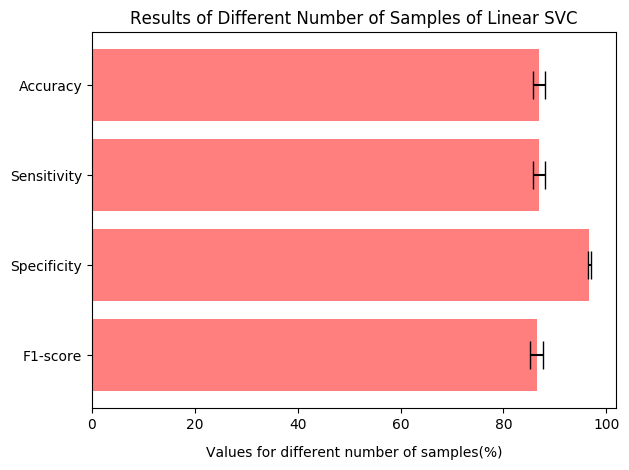

In [3]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(y_pos, CTEs, xerr=error,color='r',
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Values for different number of samples(%)',labelpad=10)
ax.set_title('Results of Different Number of Samples of Linear SVC')

plt.tight_layout()
plt.savefig('noofsamplebar.png',dpi=300, transparent=False, bbox_inches='tight')
plt.show()


In [4]:
import brewer2mpl

In [5]:
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
colors = bmap.mpl_colors

In [6]:
def perc(data):
   median = np.median(data)
   perc_25 = np.percentile(data,25)
   perc_75 = np.percentile(data,75)
   return median, perc_25, perc_75
x=np.array([1000,800,600,500,300,100,50])
accuracy_s = np.array([87.5,87.5,87.5,87.6,88.0,85.8,84.5])
accuracy_r=np.array([82.6,82.9,83.1,83.1,82.6,82.7,84.1])
# compute the medians and 25/75 percentiles
med_low_mut, perc_25_low_mut, perc_75_low_mut = perc(accuracy)
med_high_mut, perc_25_high_mut, perc_75_high_mut = perc(accuracy_r)

/home/sumona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'middle right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


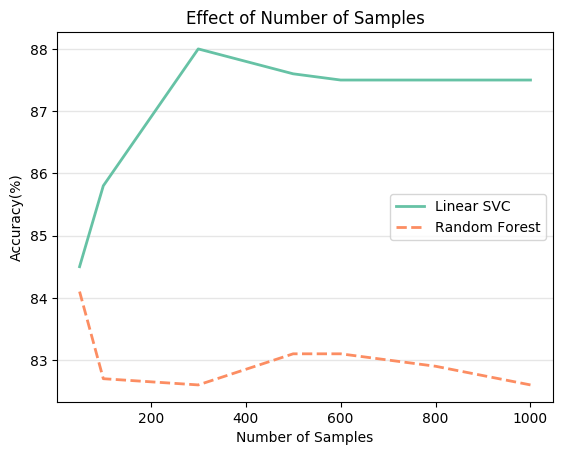

In [7]:
# plot it!

fig, ax = plt.subplots(1)
ax.plot(x, accuracy_s, label='Linear SVC', linewidth=2, color=colors[0])
ax.plot(x, accuracy_r,label='Random Forest', linewidth=2, linestyle='--', color=colors[1])
#ax.fill_between(x, med_low_mut, perc_75_low_mut, \
         #alpha=0.25, linewidth=0, color=colors[0])
#ax.fill_between(x, med_high_mut, perc_75_high_mut, \
         #alpha=0.25, linewidth=0, color=colors[1])
ax.set_title('Effect of Number of Samples')
ax.legend(loc='middle right')
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Accuracy(%)')
ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
fig.savefig('effectofsamples.png',dpi=300, transparent=False, bbox_inches='tight')

In [8]:
svm1=np.array([86,85.3,85.5,85.1,84.4,83.5,83.1,82.9,82.8,83.4,82.5])
svm2=np.array([86.8,86.7,86.2,86.2,86.2,86.9,86.8,86.4,86.6,86.2,86.3])
rf1=np.array([91.3,91.4,92.1,92.1,91.8,92.7,92.1,91.9,91.6,91.6,90.2])
rf2=np.array([89.4,90.4,90.3,91,91.3,91.1,92.6,91.6,91.8,91.1,91.7])
y=np.array([1,2,3,4,5,6,7,8,9,10,15])

In [9]:
np.shape(y)

(11,)

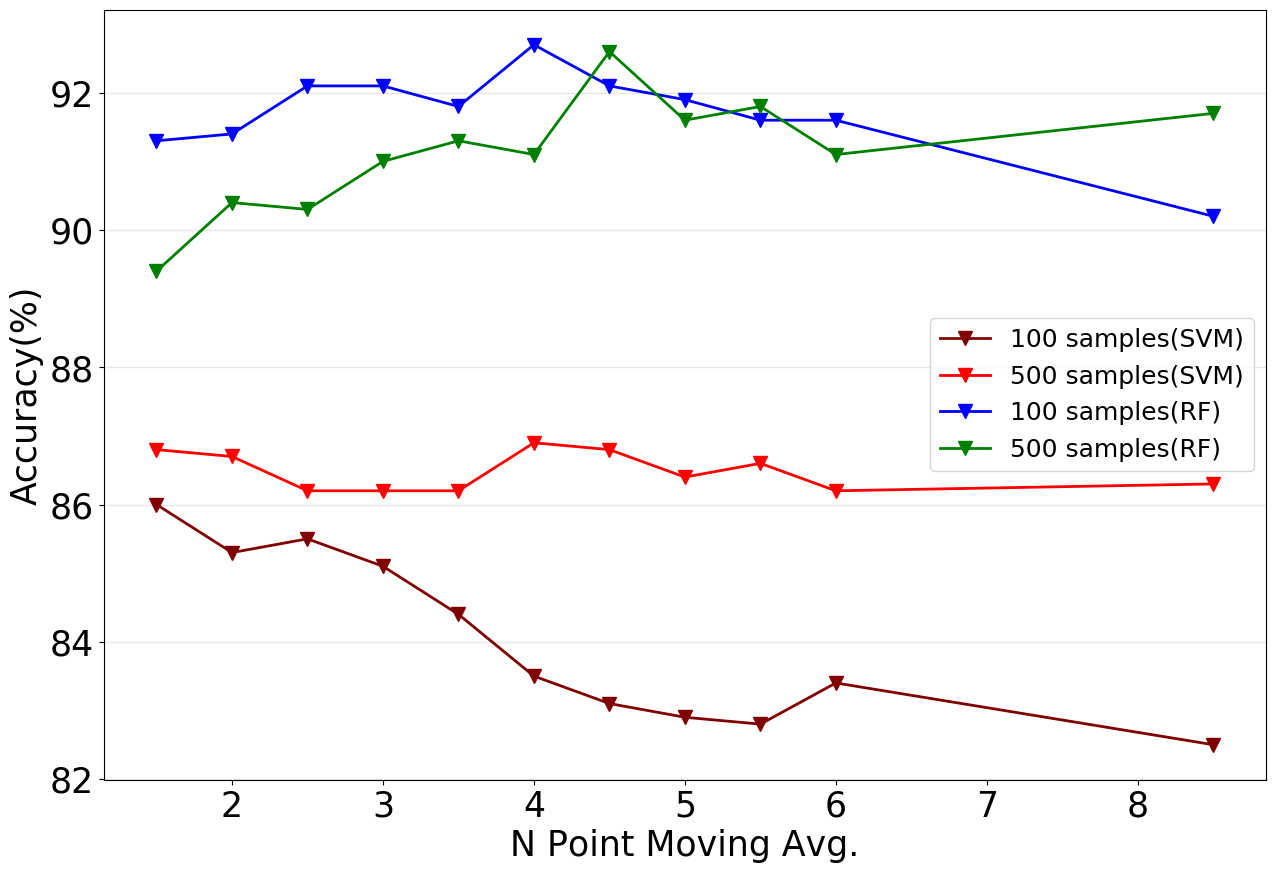

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
plt.rc('lines', linewidth=2, linestyle='-', marker='v')
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.size'] = '5.0'
ax.plot(y, svm1, label='100 samples(SVM)', linewidth=2,linestyle='-' ,color='maroon')
ax.plot(y, svm2,label='500 samples(SVM)', linewidth=2, linestyle='-', color='red')
ax.plot(y, rf1,label='100 samples(RF)', linewidth=2, linestyle='-', color='blue')
ax.plot(y, rf2,label='500 samples(RF)', linewidth=2, linestyle='-', color='green')
#ax.fill_between(x, med_low_mut, perc_75_low_mut, \
         #alpha=0.25, linewidth=0, color=colors[0])
#ax.fill_between(x, med_high_mut, perc_75_high_mut, \
         #alpha=0.25, linewidth=0, color=colors[1])
#ax.set_title('Effect of Smoothing')
#ax.set_xticks(range(1,15))
ax.set_xticklabels(y)
ax.tick_params( labelsize=25) 
ax.legend(loc='center right',prop={'size': 18})
ax.set_xlabel('N Point Moving Avg.',fontsize='25')
ax.set_ylabel('Accuracy(%)',fontsize='25')
ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
fig.savefig('effectofsmoothing.pdf',dpi=300, transparent=False, bbox_inches='tight')

In [11]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
#import librosa
import pandas as pd
%matplotlib inline

def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player
    
    Notebook: C1/B_PythonAudio.ipynb
    
    Args: 
        x: Input signal
        Fs: Sampling rate of x    
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(1,1))
    fig,ax = plt.subplots( nrows=1, ncols=1 )
    y= list(range(1, len(x)+1))
    y=np.array(y)/Fs
    plt.plot(y,x, color='gray')
    plt.tight_layout()
    plt.xlim([0,2])
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 0.5))
    #ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    plt.xlabel('Time(sec)')
    plt.ylabel('Amplitude')
    #plt.title('Noise Mixed Heart Sound Recording')
    plt.tight_layout()
    plt.show()
    fig.savefig('noisy.png',dpi=300,figsize=[3,1], transparent=False, bbox_inches='tight')
    ipd.display(ipd.Audio(data=x, rate=Fs))



WAV file (default):  Fs = 44100, x.shape = (882000,), x.dtype = float64


<Figure size 72x72 with 0 Axes>

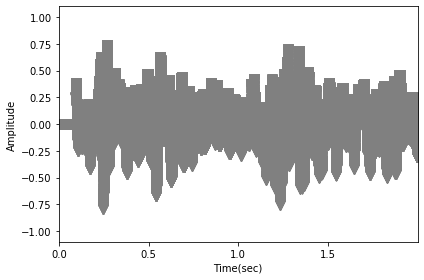

In [12]:
import soundfile as sf

# Read wav with default
fn_wav = 'noise.wav'
x, Fs = sf.read(fn_wav)
#x=x[0:100000]
print_plot_play(x=x,Fs=Fs,text='WAV file (default): ')



In [13]:
    import soundfile as sf

# Read wav with default
    fn_wav1 = 'clean.wav'
    x1, Fs1 = sf.read(fn_wav1)
    fn_wav2 = 'noise.wav'
    x2, Fs2 = sf.read(fn_wav2)
    fn_wav3 = 'mixed.wav'
    x3, Fs3 = sf.read(fn_wav3)





    plt.figure(figsize=(6,3))
    fig,ax = plt.subplots( nrows=3, ncols=1 )
    y1= list(range(1, len(x1)+1))
    y1=np.array(y1)/Fs1
    y2= list(range(1, len(x2)+1))
    y2=np.array(y2)/Fs2
    ax[0].plot(y1, x1)
   
    ax[1].plot(y2,x2)
    
    ax[2].plot(y1,x3)
    
    #plt.plot(y,x, color='gray')
    plt.tight_layout()
   plt.xlim([0,2])
    #start, end = ax.get_xlim()
    #ax.xaxis.set_ticks(np.arange(start, end, 0.5))
    #start, end = ax.get_xlim()
    #ax.xaxis.set_ticks(np.arange(start, end, 0.5))
    #ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    plt.xlabel('Time(sec)')
    plt.ylabel('Amplitude')
    #plt.title('Noise Mixed Heart Sound Recording')
    plt.tight_layout()
    plt.show()
    fig.savefig('noisy.png',dpi=300,figsize=[3,1], transparent=False, bbox_inches='tight')
    ipd.display(ipd.Audio(data=x1, rate=Fs1))

IndentationError: unexpected indent (<ipython-input-13-e9c981524ec1>, line 29)

In [15]:
accuracy_b1=np.array([81.3,75.2,74,72,68.8])
accuracy_b2=np.array([95.8,86.8,77.6,76.4,70])
accuracy_e=np.array([87.5,84.8,83.2,82,79.2])
accuracy_p1=np.array([98.3,89.2,84,78.4,74])
accuracy_p2=np.array([96.4,90.4,87.2,83.2,77.2])
#accuracy_b2=np.array([95.4,89.08,89.5,87.68,83.88,82])
#y=np.array([clean,15, 10,5,0])

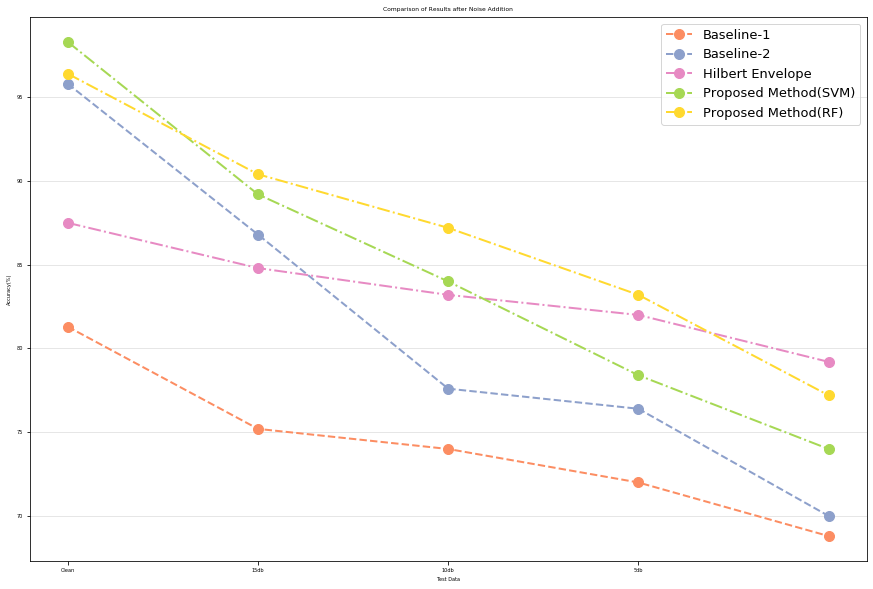

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(accuracy_b1,label='Baseline-1', linewidth=2, linestyle='--', color=colors[1])
ax.plot(accuracy_b2,label='Baseline-2', linewidth=2, linestyle='--', color=colors[2])
ax.plot(accuracy_e,label='Hilbert Envelope', linewidth=2, linestyle='-.', color=colors[3])
ax.plot(accuracy_p1,label='Proposed Method(SVM)', linewidth=2, linestyle='-.', color=colors[4])
ax.plot(accuracy_p2,label='Proposed Method(RF)', linewidth=2, linestyle='-.', color=colors[5])
#ax.plot(y, accuracy_b2,label='Baseline-02', linewidth=2, linestyle='-', color=colors[5])
data = ['Clean','15db','10db','5db','0db']
ax.set_xticks(range(0,4))
ax.set_xticklabels(data)
ax.set_title('Comparison of Results after Noise Addition')
ax.legend(loc='upper right', prop={'size': 13})
ax.set_xlabel('Test Data')
ax.set_ylabel('Accuracy(%)')
ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
fig.savefig('effectofnoise.pdf',dpi=300, transparent=False, bbox_inches='tight')

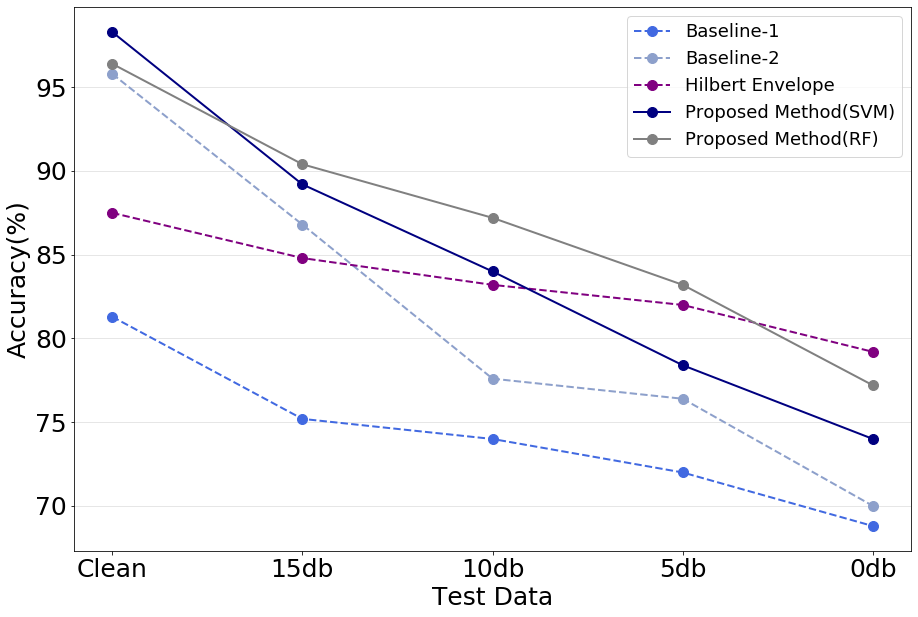

In [17]:
b1_e=np.array([12.35,15.40,13.78,16.06,16.46])
b2_e=np.array([0.68,3.45,1.95,4.45,6.07])
e_e=np.array([5.12,7.07,9.12,4.56,4.56])
p1_e=np.array([0.68,5.74,2.53,8.71,4.38])
p2_e=np.array([0.86,3.2,3.71,6.14,6.52])
y=[0,1,2,3,4]
fig, ax = plt.subplots(figsize=(15,10))
plt.rc('lines', linewidth=2, linestyle='-', marker='o')
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.size'] = '5.0'
ax.plot(accuracy_b1,label='Baseline-1', linewidth=2, linestyle='--', color='royalblue')
#ax.errorbar(y,accuracy_b1,yerr=b1_e,fmt='o', color='black',ecolor=colors[1], elinewidth=1, capsize=0);
ax.plot(accuracy_b2,label='Baseline-2', linewidth=2, linestyle='--', color=colors[2])
#ax.errorbar(y,accuracy_b2,yerr=b2_e, fmt='o', color='black',ecolor=colors[2], elinewidth=1, capsize=0);
ax.plot(accuracy_e,label='Hilbert Envelope', linewidth=2, linestyle='--', color='purple')
#ax.errorbar(y,accuracy_e,yerr=e_e, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);
ax.plot(accuracy_p1,label='Proposed Method(SVM)', linewidth=2, linestyle='-', color='navy')
#ax.errorbar(y,accuracy_p1,yerr=p1_e, fmt='o', color='black',ecolor='lightgray', elinewidth=3, capsize=0);
ax.plot(accuracy_p2,label='Proposed Method(RF)', linewidth=2, linestyle='-', color='gray')
#ax.errorbar(y,accuracy_p2,yerr=p2_e, fmt='o', color='black', ecolor=colors[3], elinewidth=1, capsize=0);
#ax.plot(y, accuracy_b2,label='Baseline-02', linewidth=2, linestyle='-', color=colors[5])
data = ['Clean','15db','10db','5db','0db']
ax.set_xticks(range(0,5))
ax.set_xticklabels(data)
ax.tick_params( labelsize=25) 
#ax.set_title('Comparison of Results after Noise Addition')
ax.legend(loc='upper right',prop={'size': 18})
ax.set_xlabel('Test Data',fontsize='25')
ax.set_ylabel('Accuracy(%)',fontsize='25')
ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
fig.savefig('effectofnoise.pdf',dpi=300, transparent=False, bbox_inches='tight')

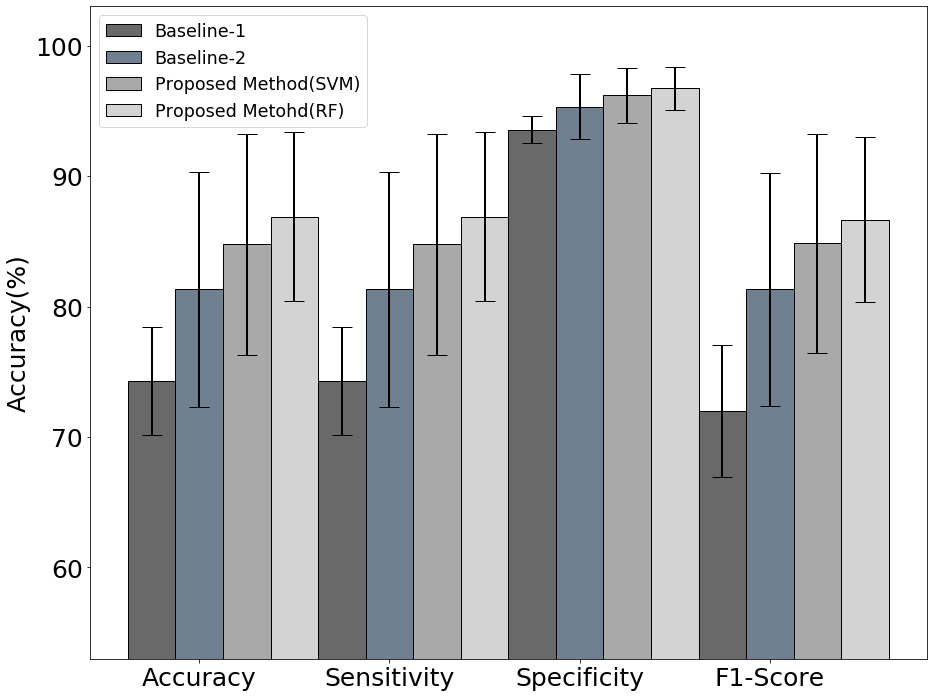

In [34]:
# set width of bar
barWidth = 0.25
 
# set height of bar
baseline1 = [74.28,74.28,93.57,71.99]
a_s1=[4.13,4.13,1.03,5.09]
baseline2= [81.32,81.32,95.33,81.32]
a_s2=[9,9,2.52,8.91]
envelope = [84.78,84.78,96.19,84.84]
a_s3=[8.48,8.48,2.12,8.38]
method=[86.88,86.88,96.72,86.67]
a_s4=[6.49,6.49,1.62,6.34]
# Set position of bar on X axis
r1 = np.arange(len(baseline1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
fig, ax = plt.subplots(figsize=(15,12))
plt.ylim([math.ceil(65-0.5*(90-65)), math.ceil(90+0.5*(90-65))])
# Make the plot
ax.bar(r1, baseline1,yerr=a_s1, color='dimgray', width=barWidth, edgecolor='black', label='Baseline-1',align='center',capsize=10)
ax.bar(r2, baseline2,yerr=a_s2, color='slategray', width=barWidth, edgecolor='black', label='Baseline-2',align='center',capsize=10)
ax.bar(r3, envelope,yerr=a_s3, color='darkgrey', width=barWidth, edgecolor='black', label='Proposed Method(SVM)',align='center',capsize=10)
ax.bar(r4, method,yerr=a_s4, color='lightgrey', width=barWidth, edgecolor='black', label='Proposed Metohd(RF)',align='center',capsize=10) 
# Add xticks on the middle of the group bars
plt.ylabel('Accuracy(%)',fontsize='25')
#plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(baseline1))], ['Accuracy', 'Sensitivity', 'Specificity', 'F1-Score'])
ax.tick_params( labelsize=25) 
# Create legend & Show graphic
plt.legend(loc=2, prop={'size': 17.5})
plt.show()
fig.savefig('11.pdf',dpi=300, transparent=False, bbox_inches='tight', facecolor='w', edgecolor='k')

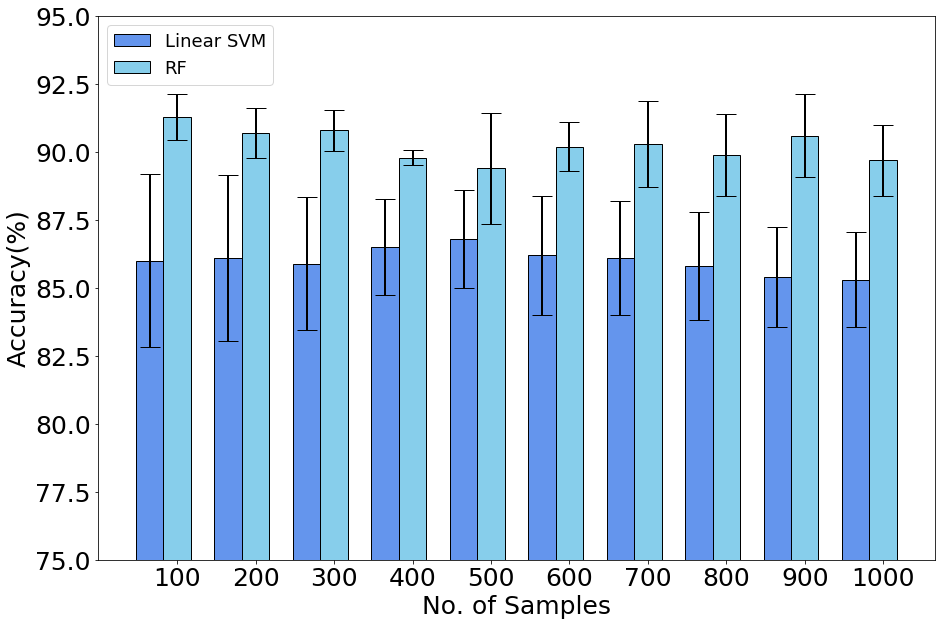

In [35]:
# set width of bar
barWidth = 0.35
import math
 
# set height of bar
baseline1 = [86,86.1,85.9,86.5,86.8,86.2,86.1,85.8,85.4,85.3]
a_s1=[3.18,3.05,2.43,1.77,1.79,2.2,2.10,1.99,1.85,1.75]
baseline2= [91.3,90.7,90.8,89.8,89.4,90.2,90.3,89.9,90.6,89.7]
a_s2=[0.84,0.91,0.76,0.27,2.04,0.91,1.57,1.52,1.52,1.30]

# Set position of bar on X axis
r1 = np.arange(len(baseline1))
r2 = [x + barWidth for x in r1]

fig, ax = plt.subplots(figsize=(15,10))
plt.ylim([math.ceil(80-0.5*(90-80)), math.ceil(90+0.5*(90-80))])
# Make the plot
ax.bar(r1, baseline1,yerr=a_s1, color='cornflowerblue', width=barWidth, edgecolor='black', label='Linear SVM',align='center',capsize=10)
ax.bar(r2, baseline2,yerr=a_s2, color='skyblue', width=barWidth, edgecolor='black', label='RF',align='center',capsize=10)
# Add xticks on the middle of the group bars

plt.xlabel('No. of Samples',fontsize='25')
plt.ylabel('Accuracy(%)',fontsize='25')
plt.xticks([r + barWidth for r in range(len(baseline1))], ['100', '200', '300', '400','500','600','700','800','900','1000'])
ax.tick_params( labelsize=25) 
# Create legend & Show graphic
plt.legend(loc=2, prop={'size': 18})
plt.show()
fig.savefig('effectofsamples.pdf',dpi=300, transparent=False, bbox_inches='tight', facecolor='w', edgecolor='k')